In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

In [3]:
num = 0
e = 4

In [4]:
prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
prior_weights *= -1

In [5]:
model = Net_mask()
model.load_state_dict(torch.load(f'../data/@/weight_init/rml_e{e}_{num}.pth'))
init_weights = torch.cat([param.view(-1) for param in model.parameters()])
#model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e4/{num}/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])
n_param = len(prior_weights)
print(n_param)

13210


In [6]:
print(init_weights)
print(prior_weights)
print(posterior_weights)

tensor([ 0.0323,  0.0241,  0.2177,  ...,  0.0099,  0.0236, -0.0335],
       grad_fn=<CatBackward0>)
tensor([-0.5871, -0.5826,  0.0412,  ...,  0.1107,  0.3478,  0.7406])
tensor([0.0238, 0.0733, 0.1377,  ..., 0.3689, 0.0090, 0.3881],
       grad_fn=<CatBackward0>)


In [7]:
print(torch.sum((init_weights + prior_weights)**2))

tensor(1263.3491, grad_fn=<SumBackward0>)


In [8]:
x_min = -1
x_max = 1
lim1 = 0.1
lim2 = 0.1
#lim2 = lim1
x = np.linspace(x_min, x_max, 1000)
x2_p1 = np.linspace(x_min, lim2-lim1, 1000)
x2_p2 = np.linspace(lim2+lim1, x_max, 1000)
x2_p3 = np.linspace(x_min, -lim1 - lim2, 1000)
x2_p4 = np.linspace(-lim2 + lim1, x_max, 1000)
y2_p1 = x2_p1*0+lim2
y2_p2 = x2_p2*0+lim2
y2_p3 = x2_p3*0 -lim2
y2_p4 = x2_p4*0 -lim2
a1_up = lim1 + x
a1_down = -lim1 + x
a2_up = lim2 + 0*x
a2_down = -lim2 + 0*x

p_x = [lim2 - lim1, lim2 + lim1, -lim2 - lim1, -lim2 + lim1]
p_y = [lim2, lim2, -lim2, -lim2]

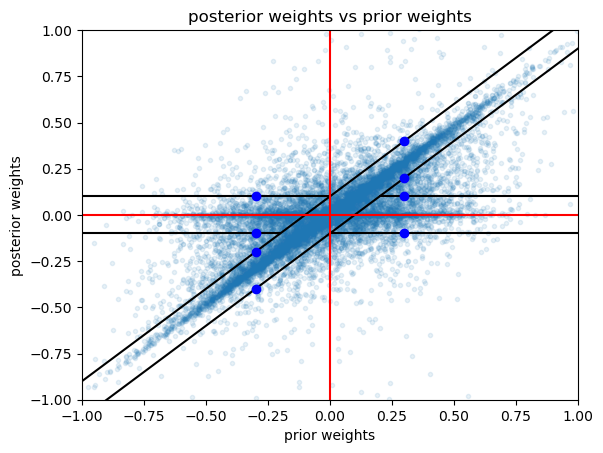

In [9]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.1)
plt.plot(x, a1_up, 'k')
plt.plot(x, a1_down, 'k')
plt.plot(x2_p1, y2_p1, 'k')
plt.plot(x2_p2, y2_p2, 'k')
plt.plot(x2_p3, y2_p3, 'k')
plt.plot(x2_p4, y2_p4, 'k')
#plt.plot(x, a2_up, 'r')
#plt.plot(x, a2_down, 'r')
#plt.plot(p_x, p_y, 'bo')
#plt.plot([-1, 1], [-1, 1], alpha=0.1)

x_point = 0.3
a1_min = x_point - lim1
a1_max = x_point + lim1
a2_min = -lim2
a2_max = lim2
x_point_neg = -0.3
a1_min_neg = x_point_neg - lim1
a1_max_neg = x_point_neg + lim1
a2_min_neg = -lim2
a2_max_neg = lim2
plt.plot([x_point, x_point, x_point, x_point], [a1_min, a1_max, a2_min, a2_max], 'bo')
plt.plot([x_point_neg, x_point_neg, x_point_neg, x_point_neg], [a1_min_neg, a1_max_neg, a2_min_neg, a2_max_neg], 'bo')

plt.plot(x, x*0, 'r')
plt.plot(0*x, x, 'r')
plt.axis([x_min, x_max, x_min, x_max])
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('posterior weights vs prior weights')
plt.savefig(f'../figures/plot_weights_posterior_vs_prior/plot_weights.png')

In [10]:
#prior_weights = prior_weights 
a1_min_tens = prior_weights - lim1
a1_max_tens = prior_weights + lim1
a2_min_tens = prior_weights*0 - lim2
a2_max_tens = prior_weights*0 + lim2

In [11]:
#plt.plot(prior_weights, a1_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a1_max_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_max_tens, '.', alpha=0.1)

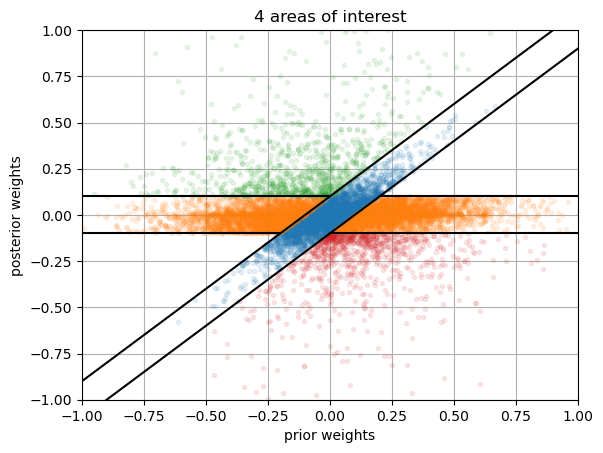

In [21]:
a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
a2_mask = torch.logical_and(torch.logical_not(a1_mask), torch.logical_and(posterior_weights >= a2_min_tens, posterior_weights <= a2_max_tens))
a3_mask = torch.logical_and(posterior_weights > a1_max_tens, posterior_weights > a2_max_tens)
a4_mask = torch.logical_and(posterior_weights < a1_min_tens, posterior_weights < a2_min_tens)
a1_prior = torch.masked_select(prior_weights, a1_mask)
a2_prior = torch.masked_select(prior_weights, a2_mask)
a3_prior = torch.masked_select(prior_weights, a3_mask)
a4_prior = torch.masked_select(prior_weights, a4_mask)
a1_posterior = torch.masked_select(posterior_weights, a1_mask)
a2_posterior = torch.masked_select(posterior_weights, a2_mask)
a3_posterior = torch.masked_select(posterior_weights, a3_mask)
a4_posterior = torch.masked_select(posterior_weights, a4_mask)
plt.plot(a1_prior.detach(), a1_posterior.detach(), '.', alpha=0.1)
plt.plot(a2_prior.detach(), a2_posterior.detach(), '.', alpha=0.1)
plt.plot(a3_prior.detach(), a3_posterior.detach(), '.', alpha=0.1)
plt.plot(a4_prior.detach(), a4_posterior.detach(), '.', alpha=0.1)

plt.plot(x, a1_up, 'k')
plt.plot(x, a1_down, 'k')
plt.plot(x2_p1, y2_p1, 'k')
plt.plot(x2_p2, y2_p2, 'k')
plt.plot(x2_p3, y2_p3, 'k')
plt.plot(x2_p4, y2_p4, 'k')
#plt.plot(x, x*0, 'k')
#plt.plot(0*x, x, 'k')
plt.grid()

plt.axis([x_min, x_max, x_min, x_max])

plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('4 areas of interest')
plt.savefig(f'../figures/plot_weights_posterior_vs_prior/4_areas.png')

In [13]:
a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
print(len(a1_mask[a1_mask]))
print(torch.sum(a1_mask*1))

7569
tensor(7569)


In [14]:
x_min = -1
x_max = 1
lim1 = 0.1
lim2 = 0.1

f_list = list(range(100)) 
f_len = len(f_list)
areas_num = torch.zeros(2, 4, f_len)
for idx, e in enumerate([4, 5]):
    for idx_num, num in enumerate(f_list):
        prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
        prior_weights *= -1
        model = Net_mask()
        model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
        posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])

        a1_min_tens = prior_weights - lim1
        a1_max_tens = prior_weights + lim1
        a2_min_tens = prior_weights*0 - lim2
        a2_max_tens = prior_weights*0 + lim2
        
        a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
        a2_mask = torch.logical_and(torch.logical_not(a1_mask), torch.logical_and(posterior_weights >= a2_min_tens, posterior_weights <= a2_max_tens))
        a3_mask = torch.logical_and(posterior_weights > a1_max_tens, posterior_weights > a2_max_tens)
        a4_mask = torch.logical_and(posterior_weights < a1_min_tens, posterior_weights < a2_min_tens)

        areas_num[idx, 0, idx_num] = torch.sum(a1_mask*1)
        areas_num[idx, 1, idx_num] = torch.sum(a2_mask*1)
        areas_num[idx, 2, idx_num] = torch.sum(a3_mask*1)
        areas_num[idx, 3, idx_num] = torch.sum(a4_mask*1)

In [23]:
title = f'{"Size":6} | {"Area":8} | {"min":7} | {"P10":7} | {"P50":7} | {"P90":7} | {"max":7} |\n'
s = title
#s += f'{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|{"-":10}|\n'
area_ = ['blue', 'orange', 'green', 'red']
lin = '-'*69 + '\n'
s += lin
e = 0
for a in range(4):
    s += f'{"10^4":6} | {area_[a]:8} | {torch.quantile(areas_num[e,a], 0)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 0.1)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 0.5)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 0.9)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 1)/n_param*100:7.2f} |\n'
s += lin
e = 1
for a in range(4):
    s += f'{"10^5":6} | {area_[a]:8} | {torch.quantile(areas_num[e,a], 0)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 0.1)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 0.5)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 0.9)/n_param*100:7.2f} | {torch.quantile(areas_num[e,a], 1)/n_param*100:7.2f} |\n'
s += lin 

#print(torch.quantile(areas_num[0,0], 0))
#print(torch.quantile(areas_num[0,0], 0.1))
#print(torch.quantile(areas_num[0,0], 0.5))
#print(torch.quantile(areas_num[0,0], 0.9))
#print(torch.quantile(areas_num[0,0], 1))
print(s)
with open('../figures/plot_weights_posterior_vs_prior/table.txt', 'w') as outfile:
    outfile.write('\n\n' + s[:-1])



Size   | Area     | min     | P10     | P50     | P90     | max     |
---------------------------------------------------------------------
10^4   | blue     |   50.66 |   53.08 |   55.42 |   57.48 |   59.61 |
10^4   | orange   |   20.30 |   21.85 |   22.94 |   24.08 |   25.53 |
10^4   | green    |    5.40 |    5.82 |    6.41 |    6.91 |    7.36 |
10^4   | red      |    5.23 |    5.64 |    6.12 |    6.62 |    7.34 |
---------------------------------------------------------------------
10^5   | blue     |   26.28 |   26.80 |   27.36 |   27.91 |   28.57 |
10^5   | orange   |   44.77 |   45.50 |   46.70 |   47.64 |   48.38 |
10^5   | green    |    6.81 |    7.32 |    7.68 |    8.00 |    8.42 |
10^5   | red      |    6.15 |    6.54 |    6.93 |    7.32 |    7.65 |
---------------------------------------------------------------------



(array([ 1.,  0.,  0.,  0.,  6.,  7.,  5., 10.,  6., 11.,  7., 11., 12.,
         7.,  6.,  4.,  3.,  2.,  1.,  1.]),
 array([6692.  , 6751.15, 6810.3 , 6869.45, 6928.6 , 6987.75, 7046.9 ,
        7106.05, 7165.2 , 7224.35, 7283.5 , 7342.65, 7401.8 , 7460.95,
        7520.1 , 7579.25, 7638.4 , 7697.55, 7756.7 , 7815.85, 7875.  ],
       dtype=float32),
 <BarContainer object of 20 artists>)

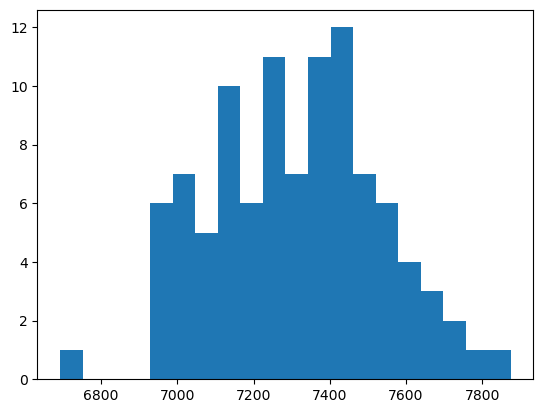

In [16]:
plt.hist(areas_num[0,0], bins=20)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 7.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 8.000e+00,
        6.000e+00, 9.000e+00, 1.200e+01, 1.100e+01, 5.000e+00, 1.300e+01,
        1.600e+01, 1.400e+01, 1.600e+01, 1.400e+01, 1.500e+01, 2.700e+01,
        3.300e+01, 2.000e+01, 3.000e+0

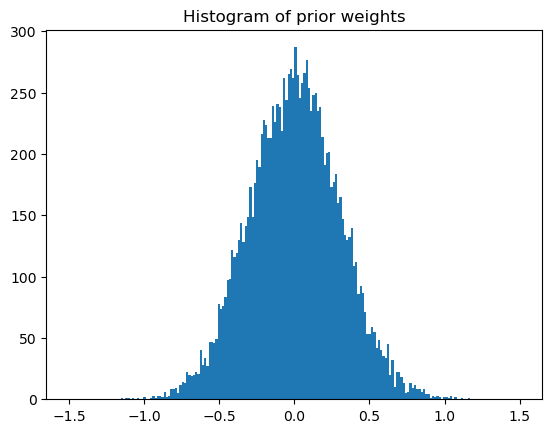

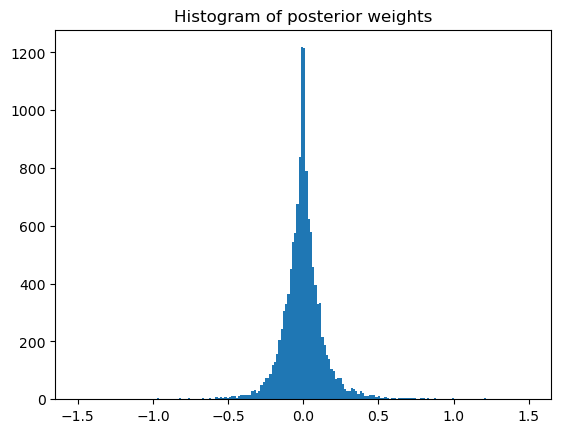

In [17]:
plt.figure(1)
plt.title('Histogram of prior weights')
plt.hist(prior_weights.detach(), range=[-1.5, 1.5], bins=200)
plt.figure(2)
plt.title('Histogram of posterior weights')
plt.hist(posterior_weights.detach(), range=[-1.5, 1.5], bins=200)

In [18]:
sorted_prior, _ = torch.sort(prior_weights)
sorted_posterior, _ = torch.sort(posterior_weights)
print(sorted_prior)
print(sorted_posterior)

tensor([-1.1522, -1.1106, -1.0960,  ...,  1.0796,  1.1140,  1.1589])
tensor([-1.5253, -1.4983, -1.4242,  ...,  1.4956,  1.5377,  1.5631],
       grad_fn=<SortBackward0>)


In [19]:
print(torch.mean(prior_weights))
print(torch.std(prior_weights))
print(torch.mean(posterior_weights))
print(torch.std(posterior_weights))

tensor(0.0019)
tensor(0.3003)
tensor(0.0003, grad_fn=<MeanBackward0>)
tensor(0.1653, grad_fn=<StdBackward0>)


Text(0, 0.5, 'prior')

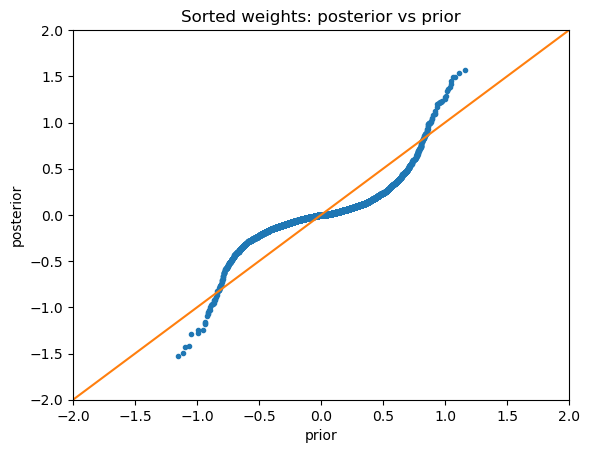

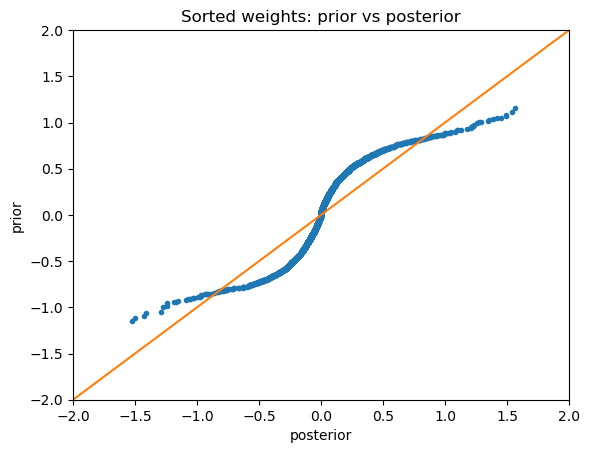

In [20]:
plt.figure()
plt.title('Sorted weights: posterior vs prior')
plt.plot(sorted_prior.detach(), sorted_posterior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior')
plt.ylabel('posterior')
plt.figure()
plt.title('Sorted weights: prior vs posterior')
plt.plot(sorted_posterior.detach(), sorted_prior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('posterior')
plt.ylabel('prior')